In [72]:
import pandas as pd
import rasterio as rio 
import matplotlib.pyplot as plt 
import os
import numpy as np
from PIL import Image 

from sklearn.model_selection import train_test_split


%matplotlib inline

In [73]:
import torch

In [74]:
maindir = "/media/abhishek/r/satproject/hilowres/SO1"

In [75]:
df = pd.read_csv(os.path.join(maindir,"index.csv"),sep = "\t")

In [76]:
df.head()

,venus_product_id,sentinel2_product_id,tensor_05m_b2b3b4b8,tensor_10m_b2b3b4b8,tensor_05m_b5b6b7b8a,tensor_20m_b5b6b7b8a,s2_tile,vns_site,date,venus_zenith_angle,patches_gpkg,nb_patches
0,VENUS-XS_20190913-110026-000_L2A_SO1_D_V2-2,SENTINEL2A_20190913-105911-507_L2A_T31TCH_D_V2-2,SO1_C_V2_31TCH_2019-09-13_05m_b2b3b4b8.pt,SO1_C_V2_31TCH_2019-09-13_10m_b2b3b4b8.pt,SO1_C_V2_31TCH_2019-09-13_05m_b4b5b6b8a.pt,SO1_C_V2_31TCH_2019-09-13_20m_b4b5b6b8a.pt,31TCH,SO1_C_V2,2019-09-13,30.255978,SO1_C_V2_31TCH_2019-09-13_patches.gpkg,403
1,VENUS-XS_20181127-110157-000_L2A_SO1_D_V2-2,SENTINEL2A_20181127-105904-560_L2A_T31TCH_D_V2-2,SO1_C_V2_31TCH_2018-11-27_05m_b2b3b4b8.pt,SO1_C_V2_31TCH_2018-11-27_10m_b2b3b4b8.pt,SO1_C_V2_31TCH_2018-11-27_05m_b4b5b6b8a.pt,SO1_C_V2_31TCH_2018-11-27_20m_b4b5b6b8a.pt,31TCH,SO1_C_V2,2018-11-27,30.255978,SO1_C_V2_31TCH_2018-11-27_patches.gpkg,236
2,VENUS-XS_20190116-110130-000_L2A_SO1_D_V2-2,SENTINEL2A_20190116-105908-963_L2A_T31TCH_D_V2-2,SO1_C_V2_31TCH_2019-01-16_05m_b2b3b4b8.pt,SO1_C_V2_31TCH_2019-01-16_10m_b2b3b4b8.pt,SO1_C_V2_31TCH_2019-01-16_05m_b4b5b6b8a.pt,SO1_C_V2_31TCH_2019-01-16_20m_b4b5b6b8a.pt,31TCH,SO1_C_V2,2019-01-16,30.255978,SO1_C_V2_31TCH_2019-01-16_patches.gpkg,151
3,VENUS-XS_20181227-110143-000_L2A_SO1_D_V2-2,SENTINEL2A_20181227-105905-947_L2A_T31TCH_D_V2-2,SO1_C_V2_31TCH_2018-12-27_05m_b2b3b4b8.pt,SO1_C_V2_31TCH_2018-12-27_10m_b2b3b4b8.pt,SO1_C_V2_31TCH_2018-12-27_05m_b4b5b6b8a.pt,SO1_C_V2_31TCH_2018-12-27_20m_b4b5b6b8a.pt,31TCH,SO1_C_V2,2018-12-27,30.255978,SO1_C_V2_31TCH_2018-12-27_patches.gpkg,8
4,VENUS-XS_20201017-105223-000_L2A_SO1_D_V2-2,SENTINEL2A_20201017-105918-558_L2A_T31TCH_D_V2-2,SO1_C_V2_31TCH_2020-10-17_05m_b2b3b4b8.pt,SO1_C_V2_31TCH_2020-10-17_10m_b2b3b4b8.pt,SO1_C_V2_31TCH_2020-10-17_05m_b4b5b6b8a.pt,SO1_C_V2_31TCH_2020-10-17_20m_b4b5b6b8a.pt,31TCH,SO1_C_V2,2020-10-17,30.255978,SO1_C_V2_31TCH_2020-10-17_patches.gpkg,267


In [77]:

# Load the file
lowresImg = torch.load(os.path.join(maindir,'SO1_C_V2_31TCH_2018-03-02_10m_b2b3b4b8.pt'))

highresImg = torch.load(os.path.join(maindir,'SO1_C_V2_31TCH_2018-03-02_05m_b2b3b4b8.pt'))

/tmp/ipykernel_7621/1631625517.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lowresImg = torch.load(os.path.join(maindir,'SO1_C_V2_31TCH_2018-03-02_10m_b2b3b4b8.pt'))


In [78]:
lowresImg.shape,highresImg.shape

(torch.Size([376, 4, 128, 128]), torch.Size([376, 4, 256, 256]))

In [79]:
lowresImg.shape[0]

376

In [80]:
# model[0][:3,:].reshape(128,128,-1)[:,:,0].max(),model[0][:3,:].reshape(128,128,-1)[:,:,1].max(),model[0][:3,:].reshape(128,128,-1)[:,:,2].max()

In [81]:
def imgrearrange(lowresImg,highresImg,i):
    npArr = np.zeros((128,128,3))
    npArr[:,:,0] = lowresImg[i][:3,:][2]
    npArr[:,:,0] = npArr[:,:,0]/(npArr[:,:,0].max())
    npArr[:,:,1] = lowresImg[i][:3,:][1]
    npArr[:,:,1] = npArr[:,:,1]/(npArr[:,:,1].max())

    npArr[:,:,2] = lowresImg[i][:3,:][0]
    npArr[:,:,2] = npArr[:,:,2]/(npArr[:,:,2].max())

    npArrHires = np.zeros((256,256,3))
    npArrHires[:,:,0] = highresImg[i][:3,:][2]
    npArrHires[:,:,0] = npArrHires[:,:,0]/(npArrHires[:,:,0].max())

    npArrHires[:,:,1] = highresImg[i][:3,:][1]
    npArrHires[:,:,1] = npArrHires[:,:,1]/(npArrHires[:,:,1].max())

    npArrHires[:,:,2] = highresImg[i][:3,:][0]
    npArrHires[:,:,2] = npArrHires[:,:,2]/(npArrHires[:,:,2].max())

    return npArr,npArrHires



In [82]:

for i in range(lowresImg.shape[0]):
    print(i)

    npArr,npArrHires = imgrearrange(lowresImg,highresImg,i)

    lowimg = Image.fromarray((npArr * 255).astype(np.uint8))
    highimg = Image.fromarray((npArrHires * 255).astype(np.uint8))
    lowimg.save(os.path.join("/media/abhishek/r/satproject/hilowres/lowresImg",f"lowresimg_{i}.png"))
    highimg.save(os.path.join("/media/abhishek/r/satproject/hilowres/highresImg",f"highresimg_{i}.png"))




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [83]:
hisresimgfolder = "/media/abhishek/r/satproject/hilowres/highresImg"
len(os.listdir(hisresimgfolder))

376

In [84]:
# imgarr = model[0,0,:]
# imgarrHires = model[0][:3,:].reshape(128,128,-1)/2185

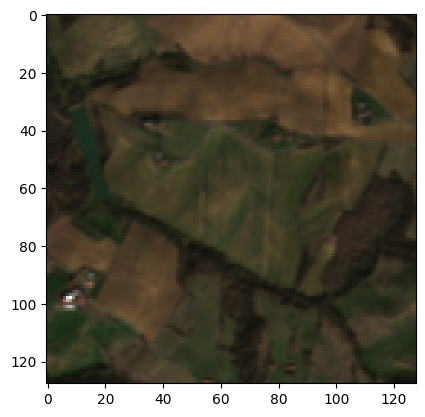

In [85]:
plt.imshow(result)

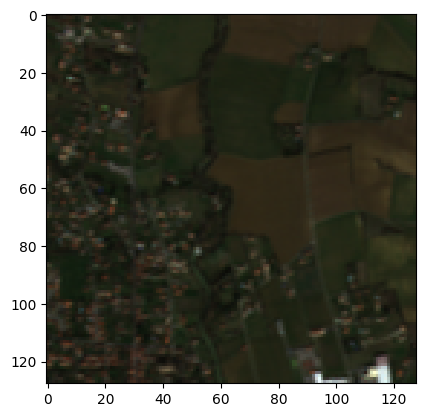

In [86]:
plt.imshow(npArr)

In [18]:

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, PReLU,BatchNormalization, Flatten
from tensorflow.keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add
from tqdm import tqdm

In [19]:
tf.keras.backend.clear_session()

In [20]:
#Define blocks to build the generator
def res_block(ip):
    
    res_model = Conv2D(64, (3,3), padding = "same")(ip)
    res_model = BatchNormalization(momentum = 0.5)(res_model)
    res_model = PReLU(shared_axes = [1,2])(res_model)
    
    res_model = Conv2D(64, (3,3), padding = "same")(res_model)
    res_model = BatchNormalization(momentum = 0.5)(res_model)
    
    return add([ip,res_model])

def upscale_block(ip):
    
    up_model = Conv2D(256, (3,3), padding="same")(ip)
    up_model = UpSampling2D( size = 2 )(up_model)
    up_model = PReLU(shared_axes=[1,2])(up_model)
    
    return up_model

#Generator model
def create_gen(gen_ip, num_res_block):
    layers = Conv2D(64, (9,9), padding="same")(gen_ip)
    layers = PReLU(shared_axes=[1,2])(layers)

    temp = layers

    for i in range(num_res_block):
        layers = res_block(layers)

    layers = Conv2D(64, (3,3), padding="same")(layers)
    layers = BatchNormalization(momentum=0.5)(layers)
    layers = add([layers,temp])

    layers = upscale_block(layers)
    layers = upscale_block(layers)

    op = Conv2D(3, (9,9), padding="same")(layers)

    return Model(inputs=gen_ip, outputs=op)

#Descriminator block that will be used to construct the discriminator
def discriminator_block(ip, filters, strides=1, bn=True):
    
    disc_model = Conv2D(filters, (3,3), strides = strides, padding="same")(ip)
    
    if bn:
        disc_model = BatchNormalization( momentum=0.8 )(disc_model)
    
    disc_model = LeakyReLU( alpha=0.2 )(disc_model)
    
    return disc_model


#Descriminartor, as described in the original paper
def create_disc(disc_ip):

    df = 64
    
    d1 = discriminator_block(disc_ip, df, bn=False)
    d2 = discriminator_block(d1, df, strides=2)
    d3 = discriminator_block(d2, df*2)
    d4 = discriminator_block(d3, df*2, strides=2)
    d5 = discriminator_block(d4, df*4)
    d6 = discriminator_block(d5, df*4, strides=2)
    d7 = discriminator_block(d6, df*8)
    d8 = discriminator_block(d7, df*8, strides=2)
    
    d8_5 = Flatten()(d8)
    d9 = Dense(df*16)(d8_5)
    d10 = LeakyReLU(alpha=0.2)(d9)
    validity = Dense(1, activation='sigmoid')(d10)

    return Model(disc_ip, validity)


#VGG19 
#We need VGG19 for the feature map obtained by the j-th convolution (after activation) 
#before the i-th maxpooling layer within the VGG19 network.(as described in the paper)
#Let us pick the 3rd block, last conv layer. 
#Build a pre-trained VGG19 model that outputs image features extracted at the
# third block of the model
# VGG architecture: https://github.com/keras-team/keras/blob/master/keras/applications/vgg19.py
from tensorflow.keras.applications import VGG19

def build_vgg(hr_shape):
    
    vgg = VGG19(weights="imagenet",include_top=False, input_shape=hr_shape)
    
    return Model(inputs=vgg.inputs, outputs=vgg.layers[10].output)

#Combined model
def create_comb(gen_model, disc_model, vgg, lr_ip, hr_ip):
    gen_img = gen_model(lr_ip)
    
    gen_features = vgg(gen_img)
    
    disc_model.trainable = False
    validity = disc_model(gen_img)
    
    return Model(inputs=[lr_ip, hr_ip], outputs=[validity, gen_features])

In [21]:
lr_images = npArr
hr_images = npArrHires

In [22]:

hr_shape = (hr_images.shape[0], hr_images.shape[1], hr_images.shape[2])
lr_shape = (lr_images.shape[0], lr_images.shape[1], lr_images.shape[2])

In [23]:
hr_shape,lr_shape

((256, 256, 3), (128, 128, 3))

In [24]:
lr_ip = Input(shape=lr_shape)
hr_ip = Input(shape=hr_shape)

generator = create_gen(lr_ip, num_res_block = 16)
generator.summary()

2024-09-03 18:24:58.829887: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2024-09-03 18:24:58.863688: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-09-03 18:24:58.863838: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.62GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2024-09-03 18:24:58.864607: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-09-03 18:24:58.866528: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-09-03 18:24:58.870281: I tensorflow/stream_executor/pl

: 

In [1]:
discriminator = create_disc(hr_ip)
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
discriminator.summary()




NameError: name 'create_disc' is not defined

In [62]:
hr_shape

(256, 256, 3)

In [63]:
vgg = build_vgg(hr_shape)
print(vgg.summary())
vgg.trainable = False



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [64]:
gan_model = create_comb(generator, discriminator, vgg, lr_ip, hr_ip)

ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 131072 but received input with shape [None, 524288]